In [1]:
import platform

print("### Pypy3 env")
os.system("pypy3 --version")

print("### Python3 env")
os.system("python3 --version")

print("### Ruby env")
os.system("ruby --version")

print("### Host OS")
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")
print(f"macOS: {platform.mac_ver()}")

### Pypy3 env
Python 3.7.13 (7e0ae751533460d5f89f3ac48ce366d8642d1db5, Apr 26 2022, 09:29:08)
[PyPy 7.3.9 with GCC Apple LLVM 13.1.6 (clang-1316.0.21.2)]
### Python3 env
Python 3.10.6
### Ruby env
ruby 3.1.2p20 (2022-04-12 revision 4491bb740a) [x86_64-darwin21]
### Host OS
System: Darwin
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Sat Jun 18 17:07:25 PDT 2022; root:xnu-8020.140.41~1/RELEASE_X86_64
Machine: x86_64
Processor: i386
macOS: ('12.5', ('', '', ''), 'x86_64')


In [10]:
import os
import numpy as np
result = {
    'python3': [],
    'pypy': [],
    'ruby': [],
    'ruby_jit': [],
    'java':[]
}

times_to_run = 1
num_entities_crate = 50
#num_crates = [10, 50, 100, 250, 500]
num_crates = [500, 1000, 1500, 2500, 5000]
#num_crates = [500]

In [11]:
# java
java_library_location = '/Users/pfeil/git/ro-crate-java/'

def calc_result_java():
    java_file = open(java_library_location+'mul_mix_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['java'].append(np.mean(b))
    os.remove(java_library_location+'mul_mix_java.txt')


print('Starting java performance tests')    

data_path = '/Users/pfeil/git/ro-crate-benchmarks/data/'
base_id = "https://www.example.com/"
for times in num_crates:
    for i in range(times_to_run): 
        os.system("cd " + java_library_location + ";./gradlew performanceMultipleCratesBenchmark --args=\""  + str(times) + ' ' + str(num_entities_crate) + ' ' + data_path +'\"')
    calc_result_java()

print(result)

Starting java performance tests

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceMultipleCratesBenchmark
time taken: 1.595 seconds

BUILD SUCCESSFUL in 2s
4 actionable tasks: 1 executed, 3 up-to-date

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceMultipleCratesBenchmark
time taken: 1.953 seconds

BUILD SUCCESSFUL in 2s
4 actionable tasks: 1 executed, 3 up-to-date

> Configure project :
Using release profile for building ro-crate-java

> Task 

In [12]:
# python3
def calc_result_py():
    
    python_file = open('mul_mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['python3'].append(np.mean(b))
    os.remove("mul_mix_py.txt")

print('Starting python3 performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("python3 performance_tests/multiple_crates/task.py " + str(times) + ' ' + str(num_entities_crate))
    calc_result_py()

print(result)
    

Starting python3 performance tests
50 1.697563886642456
50 3.416301965713501
50 5.117370843887329
50 8.45145297050476
50 17.013626098632812
{'python3': [1.697563886642456, 3.416301965713501, 5.117370843887329, 8.45145297050476, 17.013626098632812], 'pypy': [], 'ruby': [], 'ruby_jit': [], 'java': [1.595, 1.953, 2.433, 3.419, 5.966]}


In [13]:
# pypy3
def calc_result_pypy():
    
    python_file = open('mul_mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['pypy'].append(np.mean(b))
    os.remove("mul_mix_py.txt")

print('Starting python3 performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("pypy3 performance_tests/multiple_crates/task.py " + str(times) + ' ' + str(num_entities_crate))
    calc_result_pypy()

print(result)

Starting python3 performance tests
50 1.1655569076538086
50 1.7195701599121094
50 2.2314279079437256
50 3.2415640354156494
50 5.8018410205841064
{'python3': [1.697563886642456, 3.416301965713501, 5.117370843887329, 8.45145297050476, 17.013626098632812], 'pypy': [1.1655569076538086, 1.7195701599121094, 2.2314279079437256, 3.2415640354156494, 5.8018410205841064], 'ruby': [], 'ruby_jit': [], 'java': [1.595, 1.953, 2.433, 3.419, 5.966]}


In [14]:
# ruby
def calc_result_rb():
    
    rb_file = open('mul_mix_rb.txt', 'r')
    rb_lines = rb_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['ruby'].append(np.mean(b))
    os.remove("mul_mix_rb.txt")

print('Starting ruby performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("ruby performance_tests/multiple_crates/task.rb " + str(times) + ' ' + str(num_entities_crate))
    calc_result_rb()

print(result)

Starting ruby performance tests
crates = 500 entities in crate = 50 time = 84.82721400000082
crates = 1000 entities in crate = 50 time = 174.31033899999966
crates = 1500 entities in crate = 50 time = 253.88233199999922
crates = 2500 entities in crate = 50 time = 427.85832200000004
crates = 5000 entities in crate = 50 time = 861.487439999999
{'python3': [1.697563886642456, 3.416301965713501, 5.117370843887329, 8.45145297050476, 17.013626098632812], 'pypy': [1.1655569076538086, 1.7195701599121094, 2.2314279079437256, 3.2415640354156494, 5.8018410205841064], 'ruby': [84.82721400000082, 174.31033899999966, 253.88233199999922, 427.85832200000004, 861.487439999999], 'ruby_jit': [], 'java': [1.595, 1.953, 2.433, 3.419, 5.966]}


In [15]:
# ruby --jit

def calc_result_rbjit():
    
    rb_file = open('mul_mix_rb.txt', 'r')
    rb_lines = rb_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['ruby_jit'].append(np.mean(b))
    os.remove("mul_mix_rb.txt")

print('Starting ruby --jit performance tests')    

for times in num_crates:
    for i in range(times_to_run):
        os.system("ruby --jit performance_tests/multiple_crates/task.rb " + str(times) + ' ' + str(num_entities_crate))
    calc_result_rbjit()

print(result)

Starting ruby --jit performance tests
crates = 500 entities in crate = 50 time = 62.00050700000065
crates = 1000 entities in crate = 50 time = 124.58380700000089
crates = 1500 entities in crate = 50 time = 186.63875799999914
crates = 2500 entities in crate = 50 time = 316.9889920000005
crates = 5000 entities in crate = 50 time = 622.0189030000001
{'python3': [1.697563886642456, 3.416301965713501, 5.117370843887329, 8.45145297050476, 17.013626098632812], 'pypy': [1.1655569076538086, 1.7195701599121094, 2.2314279079437256, 3.2415640354156494, 5.8018410205841064], 'ruby': [84.82721400000082, 174.31033899999966, 253.88233199999922, 427.85832200000004, 861.487439999999], 'ruby_jit': [62.00050700000065, 124.58380700000089, 186.63875799999914, 316.9889920000005, 622.0189030000001], 'java': [1.595, 1.953, 2.433, 3.419, 5.966]}


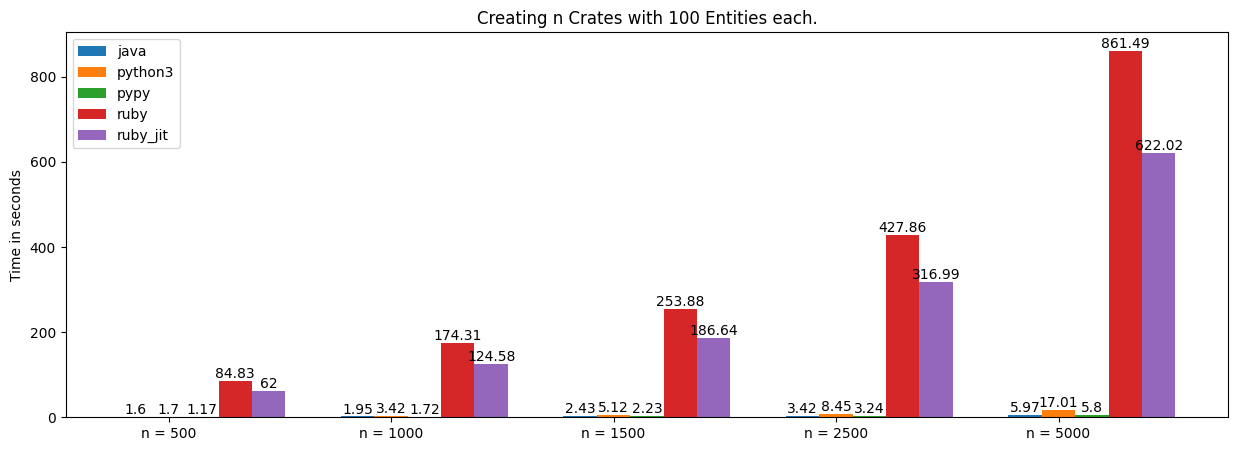

In [16]:
# plot

import matplotlib.pyplot as plt
import numpy as np

labels = ['java', 'python3', 'pypy', 'ruby', 'ruby_jit']
#labels = ['java', 'python3', 'pypy']


java_test = []
python3 = []
pypy = []
ruby = []
rubyjit = []

arrays = [[], [], [], [], []]

lan_times = len(labels)


x = np.arange(5)
ticks = np.arange(5)

width = 0.15

# plot
fig, ax = plt.subplots(1,1)
names = []
for i in num_crates:
    names.append('n = ' + str(i))

ax.set_ylabel("Time in seconds")
ax.set_xticks(ticks)
ax.set_xticklabels(names)

fig.set_figwidth(15)
fig.set_figheight(5)



for i in range(lan_times):
    arrays[i] = np.around(result[labels[i]],2)

base_width = ticks - 1*width
# if all 5
#base_width = ticks - 2*width

for i in range(lan_times):
    br = ax.bar(base_width, arrays[i], width, label=labels[i])
    ax.bar_label(br)
    base_width += width


ax.set_title('Creating n Crates with 100 Entities each.')
ax.legend()


plt.show()